# University of Aberdeen

## Applied AI (CS5079)

### Tutorial (Day 4) - Predicting wine types and quality

---

The practical is based on Chapters 9 of Practical Machine Learning with Python (D. Sarkar et al.), and the slides covered in our lectures.


## Learning Outcomes

On successful completion of this component a student will have demonstrated competence in applying the concepts learned during the lectures to solve a real-world problem. In this practical, we will predict the type and quality of wines using their chemical attributes.

### In this tutorial, we will use the following libraries and modules

In [1]:
#Essential libraries for data representation
import pandas as pd
import numpy as np

#Display and plotting libraries
from IPython.display import display
import seaborn as sn
import matplotlib.pyplot as plt

#Statistics libraries
from scipy import stats
from collections import Counter

#ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Explanations
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

## Task 1: Importing, Pre-processing and Exploratory Data Analysis

If you are not working from Codio, download and import the Wine Quality dataset from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/wine+quality. This dataset contains 11 physicochemical attributes of 1599 kind of red wines (`winequality-red.csv`) and 4898 kind of white wines (`winequality-white.csv`) as well as a quality score between 0 and 10. We will be focusing on the hour.csv file. You can look at the `winequality.names` file for more details about the dataset.

1.1. Create the corresponding Pandas dataframes `white_wine_df` and `red_wine_df`from `winequality-white.csv` and `winequality-red.csv` respectively. Please note that the separator used in the `csv` files is `;`. Print the shape and the first `5` lines for each dataframe.


In [2]:
white_wine_df= pd.read_csv("winequality-white.csv", sep=";")
red_wine_df= pd.read_csv("winequality-red.csv",sep=";")

print("The shape of the red wine dataframe is: {}".format(red_wine_df.shape))
display(red_wine_df.head(5))

print("The shape of the white wine dataframe is: {}".format(white_wine_df.shape))
display(white_wine_df.head(5))

The shape of the red wine dataframe is: (1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

The shape of the white wine dataframe is: (4898, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

1.2. We will aggregate the wine `quality` scores into low quality (scores lower or equal to 5), medium quality (scores equal to 6 or 7) and high quality (scores higher or equal to 8) wines. Create a new column `quality_label` in the two previous dataframes with the corresponding values `low`, `medium` and `high`. Cast the new columns to the type `category` and print the column datatypes.

__Tip:__ You can create a lambda function and apply it on the column `quality` to obtain the labels.

In [3]:
mask = lambda value: 'low' if value <= 5 else "medium" if value <= 7 else "high"
white_wine_df['quality_label'] = white_wine_df["quality"].apply(mask)
red_wine_df['quality_label'] = red_wine_df["quality"].apply(mask)

#Cast into categorical data types
red_wine_df['quality_label'] = red_wine_df['quality_label'].astype('category')
white_wine_df['quality_label'] = white_wine_df["quality_label"].astype('category')

1.3. Add a new column `wine_type` in each dataframe containing the corresponding values `red` and `white`. Cast the new column to the type `category`. Concatenate the red and white wines dataframes into a single `wines_df` dataframe. Shuffle the rows of the `wines_df` dataframe and reset its index.

In [4]:
white_wine_df["wine_type"] = "white"
red_wine_df["wine_type"] = "red"
wines_df = pd.concat([red_wine_df, white_wine_df])
wines_df['wine_type'] = wines_df["wine_type"].astype('category')
wines_df = wines_df.sample(frac=1).reset_index(drop=True)

1.4. For red wines, print some descriptive statistics (using `describe`) for the columns `residual sugar, total sulfur dioxide, sulphates, alcohol, volatile acidity` and `quality`. Do the same with the white wines. What can you conclude?

In [5]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
display(pd.concat([red_wine_df[subset_attributes].describe(), white_wine_df[subset_attributes].describe()], axis=1,
        keys=["Red wines", "White wines"]))

Red wines                                                 \
      residual sugar total sulfur dioxide    sulphates      alcohol   
count    1599.000000          1599.000000  1599.000000  1599.000000   
mean        2.538806            46.467792     0.658149    10.422983   
std         1.409928            32.895324     0.169507     1.065668   
min         0.900000             6.000000     0.330000     8.400000   
25%         1.900000            22.000000     0.550000     9.500000   
50%         2.200000            38.000000     0.620000    10.200000   
75%         2.600000            62.000000     0.730000    11.100000   
max        15.500000           289.000000     2.000000    14.900000   

                                       White wines                       \
      volatile acidity      quality residual sugar total sulfur dioxide   
count      1599.000000  1599.000000    4898.000000          4898.000000   
mean          0.527821     5.636023       6.391415           138.360657   
std           0.179060     0.807569       5.072058            42.498065   
min           0.120000     3.000000       0.600000             9.000000   
25%           0.390000     5.000000       1.700000           108.000000   
50%           0.520000     6.000000       5.200000           134.000000   
75%           0.640000     6.000000       9.900000           167.000000   
max           1.580000     8.000000      65.800000           440.000000   

                                                               
         sulphates      alcohol volatile acidity      quality  
count  4898.000000  4898.000000      4898.000000  4898.000000  
mean      0.489847    10.514267         0.278241     5.877909  
std       0.114126     1.230621         0.100795     0.885639  
min       0.220000     8.000000         0.080000     3.000000  
25%       0.410000     9.500000         0.210000     5.000000  
50%       0.470000    10.400000         0.260000     6.000000  
75%       0.550000    11.400000         0.320000     6.000000  
max       1.080000    14.200000         1.100000     9.000000

1.5. For each quality of wine (`low, medium` and `high`), print some descriptive statistics for the columns `alcohol`, `volatile acidity`, `pH` and `quality`. What can you infer?

In [6]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
display(pd.concat([wines_df[wines_df.quality_label == "low"][subset_attributes].describe(), 
                  wines_df[wines_df.quality_label == "medium"][subset_attributes].describe(),
                  wines_df[wines_df.quality_label == "high"][subset_attributes].describe()], axis=1,
                  keys=["Low wines", "Medium wines", "High wines"]))

Low wines                                            Medium wines  \
           alcohol volatile acidity           pH      quality      alcohol   
count  2384.000000      2384.000000  2384.000000  2384.000000  3915.000000   
mean      9.873544         0.397410     3.214522     4.884228    10.807612   
std       0.841746         0.187971     0.161311     0.357197     1.201098   
min       8.000000         0.100000     2.740000     3.000000     8.400000   
25%       9.300000         0.260000     3.110000     5.000000     9.800000   
50%       9.600000         0.337500     3.200000     5.000000    10.800000   
75%      10.400000         0.500000     3.310000     5.000000    11.700000   
max      14.900000         1.580000     3.900000     5.000000    14.200000   

                                                  High wines                   \
      volatile acidity           pH      quality     alcohol volatile acidity   
count      3915.000000  3915.000000  3915.000000  198.000000       198.000000   
mean          0.306955     3.220577     6.275607   11.691414         0.291187   
std           0.139826     0.160674     0.446877    1.273262         0.118123   
min           0.080000     2.720000     6.000000    8.500000         0.120000   
25%           0.210000     3.110000     6.000000   11.000000         0.210000   
50%           0.270000     3.210000     6.000000   12.000000         0.275000   
75%           0.360000     3.330000     7.000000   12.600000         0.350000   
max           1.040000     4.010000     7.000000   14.000000         0.850000   

                               
               pH     quality  
count  198.000000  198.000000  
mean     3.225354    8.025253  
std      0.156431    0.157289  
min      2.880000    8.000000  
25%      3.130000    8.000000  
50%      3.230000    8.000000  
75%      3.330000    8.000000  
max      3.720000    9.000000

 1.6. We will use the one-way ANOVA test to compare the difference in average among subsets of data. Use the function `stats.f_oneway` from `scipy` to compare the `pH` and `alcohol` means for our three categories of wines (`low`, `medium` and `high`). If the p-value return is less than $0.05$, we can infer that there is a statistically significant difference in mean lelvels. Do the results align with the inferences of question 1.5.?

In [7]:
F_value, p = stats.f_oneway(wines_df[wines_df.quality_label == "low"].alcohol, 
              wines_df[wines_df.quality_label == "medium"].alcohol,
              wines_df[wines_df.quality_label == "high"].alcohol)

print("The p-value for the one-way ANOVA test on the alcohol means w.r.t. the three categories of wines is {}".format(p))

F_value, p = stats.f_oneway(wines_df[wines_df.quality_label == "low"].pH, 
              wines_df[wines_df.quality_label == "medium"].pH,
              wines_df[wines_df.quality_label == "high"].pH)

print("The p-value for the one-way ANOVA test on the pH means w.r.t. the three categories of wines is {}".format(p))

The p-value for the one-way ANOVA test on the alcohol means w.r.t. the three categories of wines is 2.2715337450621843e-266
The p-value for the one-way ANOVA test on the pH means w.r.t. the three categories of wines is 0.2905002779768688


1.7. Visualize the alcohol and pH levels for the three wine quality classes (`low`, `medium` and `high`) using two boxplots.

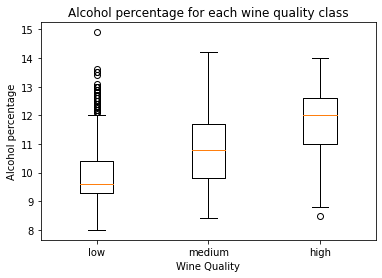

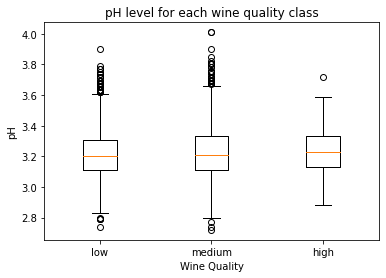

In [8]:
plt.boxplot([wines_df[wines_df.quality_label == "low"].alcohol, 
              wines_df[wines_df.quality_label == "medium"].alcohol,
              wines_df[wines_df.quality_label == "high"].alcohol])
plt.xticks(ticks=[1,2,3],labels=["low", "medium", "high"])
plt.title('Alcohol percentage for each wine quality class')
plt.xlabel("Wine Quality")
plt.ylabel("Alcohol percentage")
plt.show()

plt.boxplot([wines_df[wines_df.quality_label == "low"].pH, 
              wines_df[wines_df.quality_label == "medium"].pH,
              wines_df[wines_df.quality_label == "high"].pH])
plt.xticks(ticks=[1,2,3],labels=["low", "medium", "high"])
plt.title('pH level for each wine quality class')
plt.xlabel("Wine Quality")
plt.ylabel("pH")
plt.show()

1.8. Plot all the original attributes (`fixed acidity, volatile acidityn citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol` and `quality`) for both red and white wines using histograms with $15$ bins. What can you conclude?

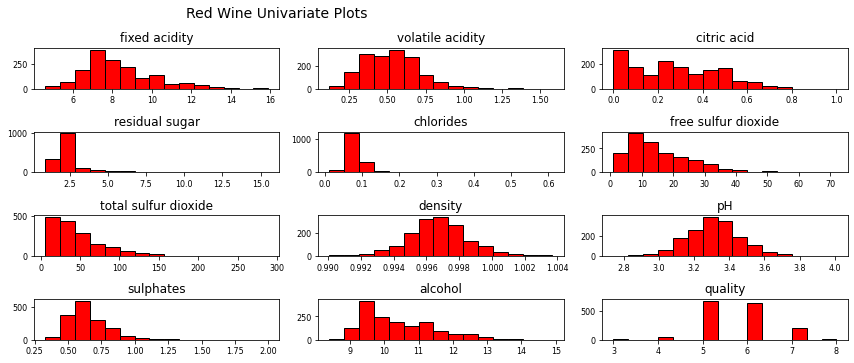

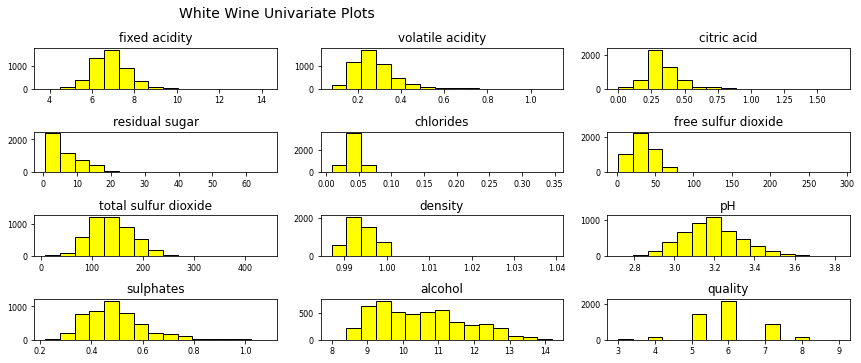

In [9]:
red_wine_df.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2, 1.2))
rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14)
white_wine_df.hist(bins=15, color='yellow', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2, 1.2))
wt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=14)

1.9. It is also important to study the relationships between multiple feature variables. Build the correlation matrix and plot it using a heatmap. You can use the Pandas function `corr()` to obtain the correlation matrix. Then, use the values to color a Seaborn’s `heatmap`. What can you conclude? Are there any strong positive/negative correlations?

<AxesSubplot:>

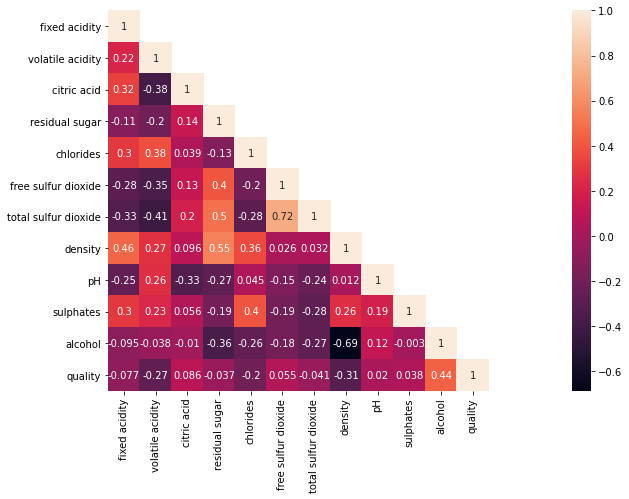

In [10]:
corrMatt = wines_df.iloc[:,:-2].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
plt.rcParams['figure.figsize']= (30,7)
sn.heatmap(corrMatt, mask=mask, vmax=1, square=True,annot=True)

1.10. Use Seaborn's `pairplot` to visualize patterns between the following attributes `wine_type`, `quality`, `sulphates` and `volatile acidity`. Set `wine_type` as the hue variable (you can also use the `palette` parameter to set up custom colors). Answer by true or false to the following statements:
* There are higher sulphate levels in white wines as compared to red wines FALSE
* Lower sulphate levels in wines with high quality ratings TRUE
* Lower levels of volatile acids in wines with high quality ratings TRUE
* There are lower volatile acid levels in red wines as compared to white wines FALSE

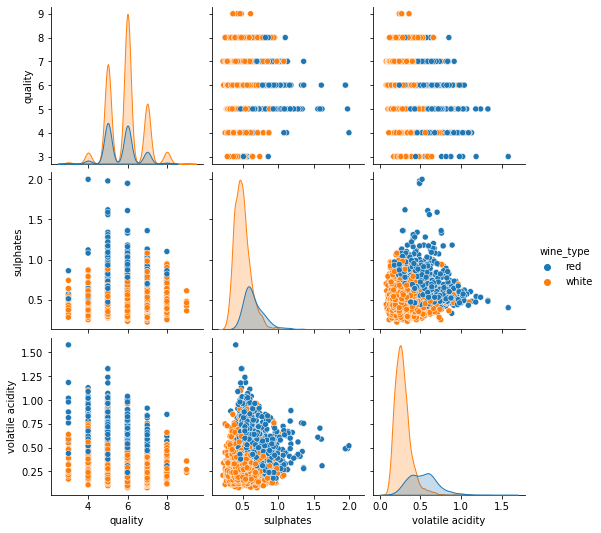

In [11]:
sn.pairplot(wines_df[["wine_type", "quality", "sulphates", "volatile acidity"]], hue="wine_type")
plt.show()

1.11. Create a Seaborn's `FacetGrid` object to visualise the variables of `wines_df` in a two dimensioal plot. Use `wine_type` as the column variable, `quality_label` as the hue variable and use `['low', 'medium', 'high']` as the `hue_order`. To plot your `FacetGrid`, use the `map` method with `plt.scatter` as the plotting function, `volatile acidity` as the x-axis and `alcohol` as the y-axis. Use the `add_legend` method to add and print the hue legend.

Comment on the following statements:
* Higher quality wines have lower volatile acidity levels and higher alcohol percentages as compared to medium and low quality wines. YES
* Red wines have lower volatile acidity as compared to white wines. NO

__Tip__: Adding an edge color and using a color palette may help in improving your scatter plot.


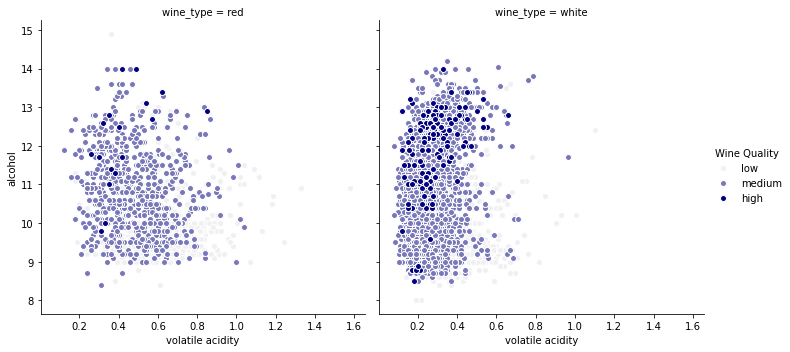

In [12]:
FG_obj = sn.FacetGrid(wines_df, col="wine_type", hue="quality_label", col_order=['red', 'white'], hue_order=['low', 'medium', 'high'], palette=sn.light_palette('navy', 3), height =5)
FG_obj.map(plt.scatter, "volatile acidity", "alcohol", edgecolor="white")
FG_obj.add_legend(title="Wine Quality")
plt.show()

## Task 2: Predicting wine types (red or white)

In this section, we will create a predicting model that will use the 11 physicochemical features to predict the wine type using a logistic regression model. 

__BONUS__: You are also invited to try and create a three-hidden layer DNN to predict the type of wine.

2.1. Normalize the 11 physicochmical features of the `wines_df` dataset using the `StandardScaler`. Then, use `train_test_split` to split the dataset into a training and testing dataset containing respectively 70% and 30% of the original dataset. Print the number of red/white wine in each dataset. Fit the default Scikit-learn's `LogisticRegression` model on the training set and predict the wine types of the test set.

In [13]:
X_all = wines_df.iloc[:,:-3]
X_feature_names = X_all.columns
X_all = StandardScaler().fit_transform(X_all)
Y_all = wines_df.wine_type

X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.3) 
print("Description of the training set: {}".format(Counter(y_train)))
print("Description of the test set: {}".format(Counter(y_test)))

wine_lr = LogisticRegression()
wine_lr.fit(X_train,y_train)
y_predicted = wine_lr.predict(X_test)

Description of the training set: Counter({'white': 3407, 'red': 1140})
Description of the test set: Counter({'white': 1491, 'red': 459})


2.2. It is time to evaluate our regression model. Use `classification_report`, `confusion_matrix` from Scikit-learn's `metrics` module to show the result of the prediction. Print model performance metrics such as the accuracy, precision, recall and F1-score.

In [14]:
print("The model accuracy score is: {}".format(accuracy_score(y_test, y_predicted)))
print("The model precision score is: {}".format(precision_score(y_test, y_predicted, average="weighted")))
print("The model recall score is: {}".format(recall_score(y_test, y_predicted, average="weighted")))
print("The model F1-score is: {}".format(f1_score(y_test, y_predicted, average="weighted")))

print(classification_report(y_test, y_predicted))

display(pd.DataFrame(confusion_matrix(y_test, y_predicted), columns=["Pred. red", "Pred. white"], index=["Act. red", "Act. white"]))

The model accuracy score is: 0.9958974358974358
The model precision score is: 0.9958974358974358
The model recall score is: 0.9958974358974358
The model F1-score is: 0.9958974358974358
              precision    recall  f1-score   support

         red       0.99      0.99      0.99       459
       white       1.00      1.00      1.00      1491

    accuracy                           1.00      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950



Pred. red  Pred. white
Act. red          455            4
Act. white          4         1487

2.3. Create an `InMemoryModel` skater model by specifying the prediction function (`predict_proba` of the logistic regression), the training dataset and the `target_names`. Instantiate an Interpretation from Skater's `core.explanations` module and make use of the `InMemoreyModel` to plot the feature importances.

2020-10-20 16:33:22,590 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[11/11] features ████████████████████ Time elapsed: 1 seconds

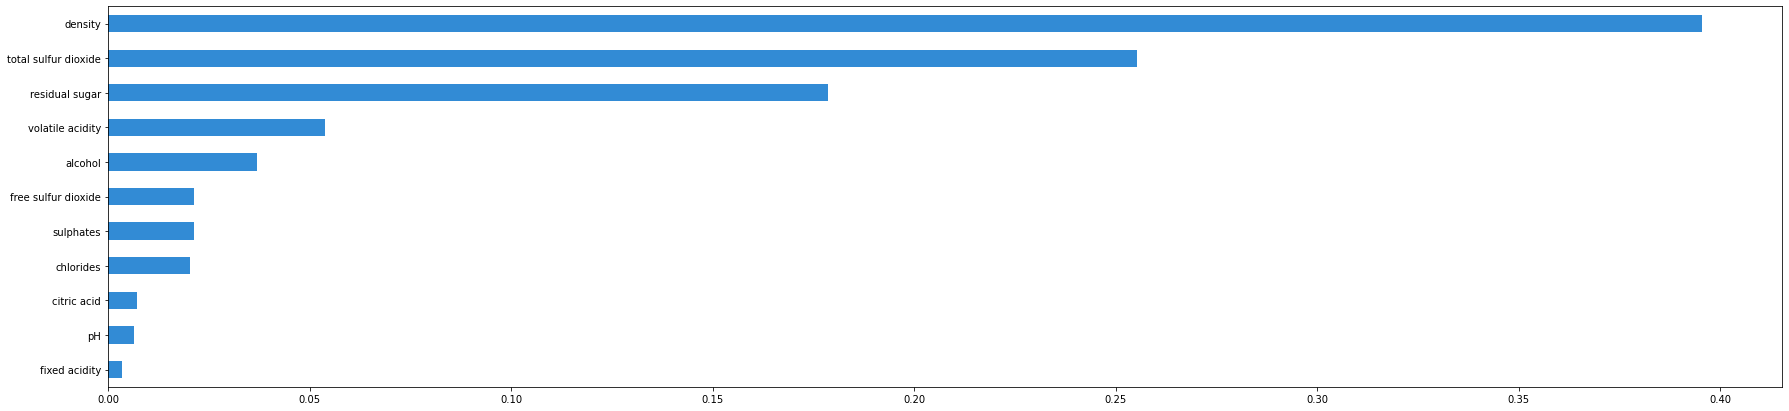

In [15]:
wine_type_lr_model = InMemoryModel(wine_lr.predict_proba, examples = X_train, target_names=["red","white"])
wine_type_interpreter = Interpretation(X_test, feature_names= X_feature_names)
wine_type_interpreter.feature_importance.plot_feature_importance(wine_type_lr_model, ascending=True)
plt.rcParams['figure.figsize']= (10,7)
plt.show()

## Task 3: Predicting wine quality (low, medium or high)

In this section, we will create a predicting model that will use the 11 physicochemical features to predict the wine quality using a Decision Tree model. 

3.1. Normalize the 11 physicochmical features of the `wines_df` dataset using the `StandardScaler`. Then, use `train_test_split` to split the dataset into a training and testing dataset containing respectively 70% and 30% of the original dataset. Print the number of low, medium and high quality wine for each dataset. Fit the default Scikit-learn's `DecisionTreeClassifier` model on the training set and predict the wine types of the test set.

In [16]:
X_all = wines_df.iloc[:,:-3]
X_feature_names = X_all.columns
X_all = StandardScaler().fit_transform(X_all)
Y_all = wines_df.quality_label

X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.3) 
print("Description of the training set: {}".format(Counter(y_train)))
print("Description of the test set: {}".format(Counter(y_test)))

wine_dt = DecisionTreeClassifier()
wine_dt.fit(X_train,y_train)
y_predicted = wine_dt.predict(X_test)

Description of the training set: Counter({'medium': 2722, 'low': 1686, 'high': 139})
Description of the test set: Counter({'medium': 1193, 'low': 698, 'high': 59})


3.2. Evaluate your model using the same approach as question 2.2.

In [17]:
print("The model accuracy score is: {}".format(accuracy_score(y_test, y_predicted)))
print("The model precision score is: {}".format(precision_score(y_test, y_predicted, average="weighted")))
print("The model recall score is: {}".format(recall_score(y_test, y_predicted, average="weighted")))
print("The model F1-score is: {}".format(f1_score(y_test, y_predicted, average="weighted")))

print(classification_report(y_test, y_predicted))

display(pd.DataFrame(confusion_matrix(y_test, y_predicted), columns=["Pred. high", "Pred. low", "Pred. medium"], index=["Act. high", "Act. low", "Act. medium"]))

The model accuracy score is: 0.7148717948717949
The model precision score is: 0.723121030615556
The model recall score is: 0.7148717948717949
The model F1-score is: 0.7182667526487603
              precision    recall  f1-score   support

        high       0.32      0.47      0.38        59
         low       0.65      0.67      0.66       698
      medium       0.79      0.75      0.77      1193

    accuracy                           0.71      1950
   macro avg       0.59      0.63      0.60      1950
weighted avg       0.72      0.71      0.72      1950



Pred. high  Pred. low  Pred. medium
Act. high            28          6            25
Act. low              9        469           220
Act. medium          50        246           897

3.3. Plot the feature importances (obtained by `feature_importances_`) computed by your decision tree model using a horizontal bar plot. Compare your results with those obtained in question 2.3.

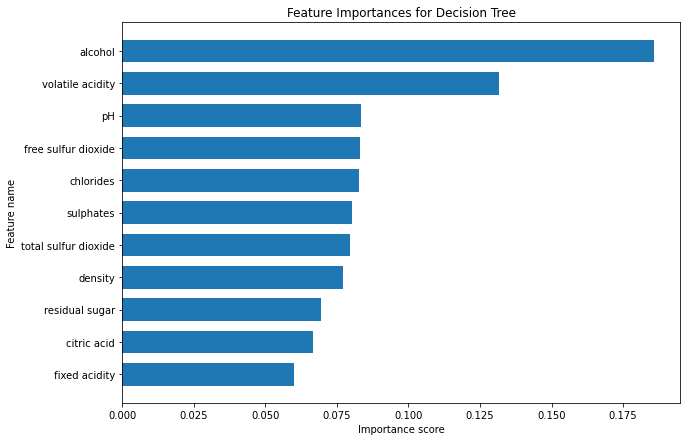

In [18]:
sorted_imp, sorted_feat_names = zip(*sorted(zip(wine_dt.feature_importances_, X_feature_names), key=lambda x : x[0]))
plt.barh(range(11), sorted_imp, height=0.7)
plt.yticks(range(11),sorted_feat_names)
plt.ylabel("Feature name")
plt.xlabel("Importance score")
plt.title("Feature Importances for Decision Tree")
plt.show()

3.4. Use the default `RandomForestClassifier` from the Scikit-learn's `ensemble` module. Fit it on the training dataset and predict on the test dataset. Evaluate the approach and compare it to the decision tree model that you created in question 3.1.

In [19]:
wine_rdf = RandomForestClassifier()
wine_rdf.fit(X_train,y_train)
y_predicted = wine_rdf.predict(X_test)

print("The model accuracy score is: {}".format(accuracy_score(y_test, y_predicted)))
print("The model precision score is: {}".format(precision_score(y_test, y_predicted, average="weighted")))
print("The model recall score is: {}".format(recall_score(y_test, y_predicted, average="weighted")))
print("The model F1-score is: {}".format(f1_score(y_test, y_predicted, average="weighted")))

print(classification_report(y_test, y_predicted))

display(pd.DataFrame(confusion_matrix(y_test, y_predicted), columns=["Pred. high", "Pred. low", "Pred. medium"], index=["Act. high", "Act. low", "Act. medium"]))

The model accuracy score is: 0.8102564102564103
The model precision score is: 0.8109481399452955
The model recall score is: 0.8102564102564103
The model F1-score is: 0.8049215570577813
              precision    recall  f1-score   support

        high       0.90      0.31      0.46        59
         low       0.79      0.72      0.76       698
      medium       0.82      0.89      0.85      1193

    accuracy                           0.81      1950
   macro avg       0.84      0.64      0.69      1950
weighted avg       0.81      0.81      0.80      1950



Pred. high  Pred. low  Pred. medium
Act. high            18          0            41
Act. low              1        506           191
Act. medium           1        136          1056

3.5. Print the parameters of you `RandomForestClassifier` using the `get_params` method. Choose a subset of parameters to vary (including `n_estimators` and `max_features`) and use Scikit-learn's `GridSearchCV` to select the best hyperparameters with `cv=5`.

In [20]:
print(wine_rdf.get_params())

param_grid = { 
    'n_estimators': [200, 300, 500],
    'max_features': [None, "sqrt", 'log2'],
    'criterion': ["gini", "entropy"],
    'max_leaf_nodes': [10000, None]
}

wine_rdf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
wine_rdf_grid.fit(X_train, y_train)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

3.6. Evaluate the best `RandomForestClassifier` obtained in 3.5. on the test dataset.

In [21]:
print(wine_rdf_grid.best_params_)
wine_rdf_grid_best= wine_rdf_grid.best_estimator_
y_predicted = wine_rdf_grid_best.predict(X_test)

print("The model accuracy score is: {}".format(accuracy_score(y_test, y_predicted)))
print("The model precision score is: {}".format(precision_score(y_test, y_predicted, average="weighted")))
print("The model recall score is: {}".format(recall_score(y_test, y_predicted, average="weighted")))
print("The model F1-score is: {}".format(f1_score(y_test, y_predicted, average="weighted")))

print(classification_report(y_test, y_predicted))

display(pd.DataFrame(confusion_matrix(y_test, y_predicted), columns=["Pred. high", "Pred. low", "Pred. medium"], index=["Act. high", "Act. low", "Act. medium"]))

{'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 10000, 'n_estimators': 200}
The model accuracy score is: 0.8102564102564103
The model precision score is: 0.8094989855062967
The model recall score is: 0.8102564102564103
The model F1-score is: 0.8051683531578195
              precision    recall  f1-score   support

        high       0.83      0.32      0.46        59
         low       0.79      0.72      0.76       698
      medium       0.82      0.89      0.85      1193

    accuracy                           0.81      1950
   macro avg       0.81      0.64      0.69      1950
weighted avg       0.81      0.81      0.81      1950



Pred. high  Pred. low  Pred. medium
Act. high            19          1            39
Act. low              0        504           194
Act. medium           4        132          1057

3.7. Plot side-by-side, the feature importances of your `RandomForestClassifier` obtained in 3.5. (with `feature_importances_`) and the feature importances returned by Skater for the same model. What can you observe? 

2020-10-20 16:46:56,736 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[11/11] features ████████████████████ Time elapsed: 1 seconds

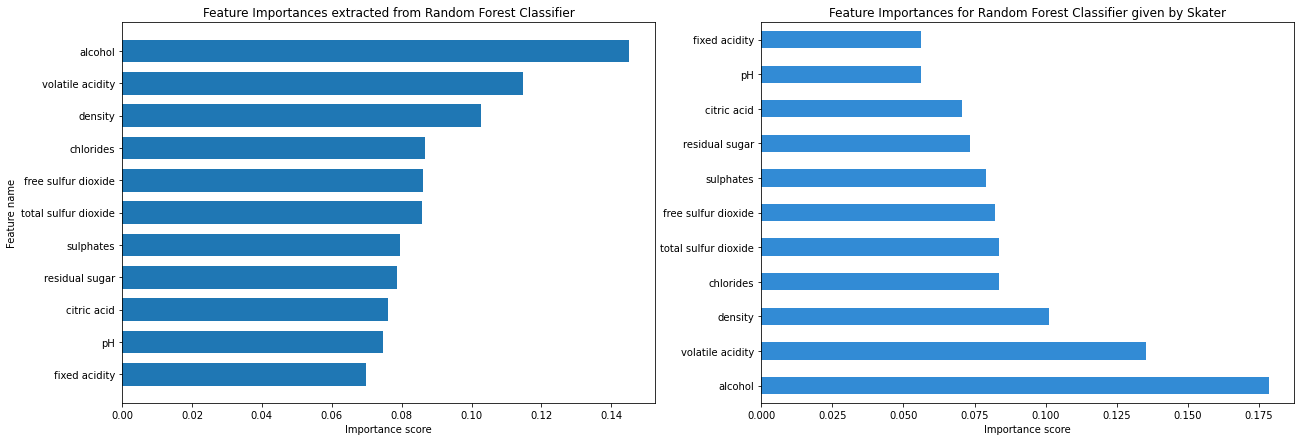

In [22]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(21,7))

#Using RF feature importances
sorted_imp, sorted_feat_names = zip(*sorted(zip(wine_rdf_grid_best.feature_importances_, X_feature_names), key=lambda x : x[0]))
ax1.barh(range(11), sorted_imp, height=0.7, tick_label=sorted_feat_names)
ax1.set_ylabel("Feature name")
ax1.set_xlabel("Importance score")
ax1.set_title("Feature Importances extracted from Random Forest Classifier")

#Using Skater
wine_type_rdf_model = InMemoryModel(wine_rdf_grid_best.predict_proba, examples = X_train, target_names=["low","medium","high"])
wine_type_interpreter = Interpretation(X_test, feature_names= X_feature_names)
wine_type_interpreter.feature_importance.plot_feature_importance(wine_type_rdf_model, ascending=False, ax=ax2)
ax2.set_xlabel("Importance score")
ax2.set_title("Feature Importances for Random Forest Classifier given by Skater")

plt.show()

3.8. Create a `LimeTabularExplainer` (from Skater's `core.local_interpretation.lime.lime_tabular` module) to interpret why your `RandomForestClassifier` model predicted the wine quality and which features were influential in its decision. Use the method `explain_instance` to visualise the explanation for a specific wine. Please note that the `show_in_notebook` method can be used to represent a LIME explanation in your notebook. Highlight the explanations for one instance of each wine quality.

In [23]:
exp = LimeTabularExplainer(X_train, feature_names=X_feature_names, discretize_continuous=True, class_names=wine_rdf_grid_best.classes_)

exp.explain_instance(X_train[0], wine_rdf_grid_best.predict_proba, top_labels=1).show_in_notebook()
exp.explain_instance(X_train[1], wine_rdf_grid_best.predict_proba, top_labels=1).show_in_notebook()
exp.explain_instance(X_train[30], wine_rdf_grid_best.predict_proba, top_labels=1).show_in_notebook()